In [7]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
import tensorflow.keras.backend as K
from tensorflow.keras import optimizers
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,\
     Dropout,Flatten,Dense,Activation,\
     BatchNormalization

In [8]:
# set some globals, which are used across the remaining functions
Image_width = 28
Image_height = 28
Image_Channels = 1
IMAGE_SHAPE = (Image_width,Image_height,Image_Channels)
NUM_CLASSES = 10
# training parameters
NUM_EPOCHS = 30
BATCH_SIZE = 128

In [9]:
# No Test labels so not using!! 
# train_df = pd.read_csv("../kaggleData/train.csv")
# test_df = pd.read_csv("../kaggleData/test.csv")

# y_train = train_df['label']
# X_train = train_df.drop('label', axis=1)
# X_test = test_df

## Data  Cleaning and Parsing

In [10]:
train_df = pd.read_csv("../kaggleData/train.csv")
# test_df = pd.read_csv("../kaggleData/test.csv")

fullX = train_df.iloc[:, 1:].values # get all row for every other column
fullY = train_df.iloc[:, :1].values # get every row for label
length = fullX.shape[0]
X_train, X_test, y_train, y_test = train_test_split(fullX, fullY, test_size = 0.2, random_state=1)

In [11]:
X_train = X_train.reshape(33600, 28, 28)
X_test = X_test.reshape(8400, 28, 28)

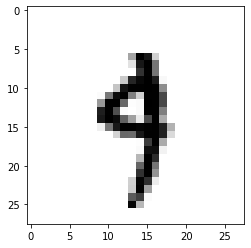

In [12]:
image_index = 3332# may select anything up to 60,000
plt.imshow(X_train[image_index], cmap='binary') # Show the image

In [13]:
X_train = (X_train.astype('float32') / 255.0)
X_test = (X_test.astype('float32') / 255.0)

x_shape = X_train.shape
x_shape

(33600, 28, 28)

## Creating Simple TensorFlow model

In [14]:
# Testing Ott's Cats and dog model
model = Sequential()

# should feed in input shape [28,28]
# only looking at image height and width

model.add(Flatten(input_shape=[28,28]))

model.add(Dense(512, activation='relu'))

model.add(Dense(256, activation='relu'))

model.add(Dense(128, activation='relu'))

model.add(Dense(50, activation='relu'))

model.add(Dense(10, activation='softmax'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 50)                6450      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                510       
Total params: 573,104
Trainable params: 573,104
Non-trainable params: 0
__________________________________________________

In [11]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=['accuracy'])

In [12]:
model.fit(X_train, y_train, epochs=NUM_EPOCHS)

Epoch 1/30
1050/1050 [==============================] - 2s 2ms/step - loss: 0.7746 - accuracy: 0.7886
Epoch 2/30
1050/1050 [==============================] - 2s 2ms/step - loss: 0.2891 - accuracy: 0.9159
Epoch 3/30
1050/1050 [==============================] - 2s 2ms/step - loss: 0.2183 - accuracy: 0.9371
Epoch 4/30
1050/1050 [==============================] - 2s 2ms/step - loss: 0.1751 - accuracy: 0.9488
Epoch 5/30
1050/1050 [==============================] - 2s 2ms/step - loss: 0.1458 - accuracy: 0.9576
Epoch 6/30
1050/1050 [==============================] - 2s 2ms/step - loss: 0.1235 - accuracy: 0.9643
Epoch 7/30
1050/1050 [==============================] - 2s 2ms/step - loss: 0.1045 - accuracy: 0.9692
Epoch 8/30
1050/1050 [==============================] - 2s 2ms/step - loss: 0.0900 - accuracy: 0.9740
Epoch 9/30
1050/1050 [==============================] - 2s 2ms/step - loss: 0.0765 - accuracy: 0.9780
Epoch 10/30
1050/1050 [==============================] - 2s 1ms/step - loss: 0.066

## Plotting our predicted Values with the digit image

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


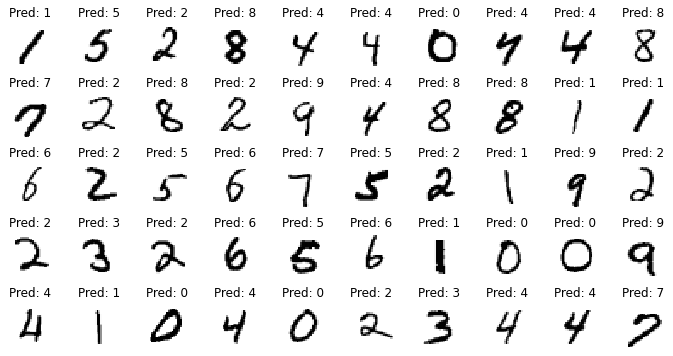

In [13]:
n_rows = 5
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_test[index], cmap="binary", interpolation="nearest")
        pred = model.predict_classes(X_test[index:index+1])[0]
        plt.title("Pred: {}".format(pred))
        plt.axis('off')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Accuracy of Model

In [14]:
#  predicting the number and selecting the digit that is most probable 
prediction = model.predict(X_test)
predictedValue = prediction.argmax(axis=1)

# Comparing predicted digit to the actual digit value to determine the accuracy of the model
accuracy = np.mean(y_test.ravel() == predictedValue.ravel())
accuracy

0.9755952380952381

## Results from doing these tests

EPOCHS = 30 

model.add(Flatten(input_shape=[28,28])) # Change from 2-D to 1-D (28*28 neurons in input layer)

model.add(Dense(512, activation='relu'))
            
model.add(BatchNormalization())

model.add(Dense(256, activation='relu'))

model.add(BatchNormalization())

model.add(Dense(100, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))

### accuracy^ 0.9792857142857143

EPOCHS = 30 

model.add(Flatten(input_shape=[28,28])) # Change from 2-D to 1-D (28*28 neurons in input layer)

model.add(Dense(512, activation='relu'))
            
model.add(BatchNormalization())

model.add(Dense(256, activation='relu'))

model.add(BatchNormalization())

model.add(Dense(512, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))

### Accuracy ^ 0.9783333333333334

EPOCHS = 30 

model.add(Flatten(input_shape=[28,28])) # Change from 2-D to 1-D (28*28 neurons in input layer)

model.add(Dense(512, activation='relu'))

model.add(Dense(256, activation='relu'))

model.add(Dense(128, activation='relu'))

model.add(Dense(50, activation='relu'))

model.add(Dense(10, activation='softmax'))

### Accuracy ^ 0.9763095238095238

## Confusion Matrix

In [15]:
from sklearn.metrics import confusion_matrix

In [16]:
#potato = confusion_matrix(y_test, newVals)
#potato

NameError: name 'newVals' is not defined

In [17]:
#preds = model.predict_classes(X_test)
#output_dict = {"ImageId": np.arange(1, len(preds) + 1, 1), "label": preds}
#preds_df = pd.DataFrame(output_dict)

In [18]:
#preds_df

,ImageId,label
0,1,1
1,2,5
2,3,2
3,4,8
4,5,4
...,...,...
8395,8396,1
8396,8397,6
8397,8398,8
8398,8399,8


In [19]:
#preds

array([1, 5, 2, ..., 8, 8, 8], dtype=int64)

In [20]:
#model.score(X_train,X_test)

AttributeError: 'Sequential' object has no attribute 'score'

In [16]:
model = Sequential()

# only looking at image height and width
model.add(Flatten(input_shape=[28,28])) # Change from 2-D to 1-D (28*28 neurons in input layer)

# Create Pyramid-like sequence for neural net
model.add(Dense(300, activation="relu"))
model.add(Dense(200, activation="relu"))
model.add(Dense(100, activation="relu"))
model.add(Dense(100, activation="relu"))
model.add(Dense(50, activation="relu"))
model.add(Dense(10, activation='softmax')) # output activation should be softmax for classication > 2 output classes

# Convolution Models

In [17]:
K.clear_session()

from tensorflow.keras.utils import to_categorical

print('Before preprocessing:')
print(' - X_train.shape = {}, y_train.shape = {}'.format(X_train.shape, y_train.shape))
print(' - X_test.shape = {}'.format(X_test.shape))

# one-hot encode labels to 10 output classes corresponding to digits 0-9
y_train = to_categorical(y_train, 10)

# reshape the image arrays (make 2D arrays instead of 3D arrays)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2], 1))

print('After preprocessing: ')
print(' - X_train.shape = {}, y_train.shape = {}'.format(X_train.shape, y_train.shape))
print(' - X_test.shape = {}'.format(X_test.shape))

Before preprocessing:
 - X_train.shape = (33600, 28, 28), y_train.shape = (33600, 1)
 - X_test.shape = (8400, 28, 28)
After preprocessing: 
 - X_train.shape = (33600, 28, 28, 1), y_train.shape = (33600, 10)
 - X_test.shape = (8400, 28, 28, 1)


In [18]:
def build_model():
    K.clear_session()
    
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(6), padding='same', activation='relu',
                    input_shape=IMAGE_SHAPE))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Conv2D(64, kernel_size=(3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Conv2D(128, kernel_size=(2), padding='same', activation='relu',
                input_shape=IMAGE_SHAPE))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Flatten())
    ## Add desnse layers 
    model.add(Dense(32, activation = 
                    'relu'))
    model.add(Dropout(0.45))
    # output is softmax for 10 classes
    model.add(Dense(10,activation = 'softmax'))
    adam = optimizers.Adam(lr = 0.001)
    model.compile(optimizer = adam, loss='categorical_crossentropy', metrics=['acc'])
    return model

model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        1184      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         32896     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0

In [19]:
NUM_EPOCHS = 20
# go for small batch size then increase as we go... to prevent overfitting 
# need to know the optimization

In [20]:
history = model.fit(X_train, y_train, epochs=NUM_EPOCHS)

Epoch 1/20
1050/1050 [==============================] - 15s 14ms/step - loss: 0.6868 - acc: 0.7571
Epoch 2/20
1050/1050 [==============================] - 14s 14ms/step - loss: 0.3476 - acc: 0.8735
Epoch 3/20
1050/1050 [==============================] - 15s 14ms/step - loss: 0.2910 - acc: 0.8918
Epoch 4/20
1050/1050 [==============================] - 15s 14ms/step - loss: 0.2550 - acc: 0.9036
Epoch 5/20
1050/1050 [==============================] - 15s 14ms/step - loss: 0.2261 - acc: 0.9159
Epoch 6/20
1050/1050 [==============================] - 15s 14ms/step - loss: 0.2168 - acc: 0.9195
Epoch 7/20
1050/1050 [==============================] - 15s 14ms/step - loss: 0.2069 - acc: 0.9224
Epoch 8/20
1050/1050 [==============================] - 15s 14ms/step - loss: 0.1894 - acc: 0.9296
Epoch 9/20
1050/1050 [==============================] - 15s 14ms/step - loss: 0.1828 - acc: 0.9335
Epoch 10/20
1050/1050 [==============================] - 15s 14ms/step - loss: 0.1792 - acc: 0.9350
Epoch 11/

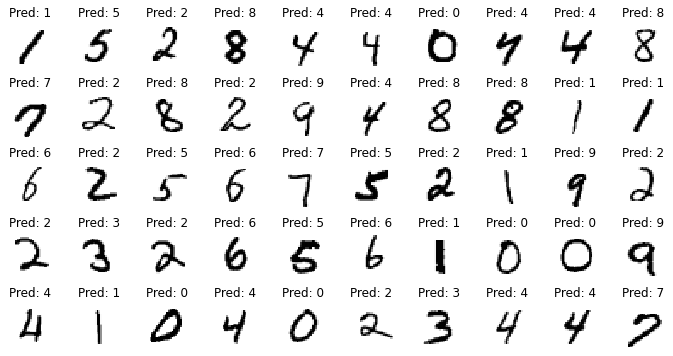

In [25]:
n_rows = 5
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_test[index].mean(axis=2), cmap="binary", interpolation="nearest")
        pred = model.predict_classes(X_test[index:index+1])[0]
        plt.title("Pred: {}".format(pred))
        plt.axis('off')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [26]:
#  predicting the number and selecting the digit that is most probable 
prediction = model.predict(X_test)
predictedValue = prediction.argmax(axis=1)

# Comparing predicted digit to the actual digit value to determine the accuracy of the model
accuracy = np.mean(y_test.ravel() == predictedValue.ravel())
accuracy

0.9891666666666666

## Results with Convolution
BATCH_SIZE = 50
NUM_EPOCHS = 5

model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu',
                    input_shape=IMAGE_SHAPE))
                    
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu',
            input_shape=IMAGE_SHAPE))
            
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dropout(0.45)) #output is softmax for 10 classes

model.add(Dense(NUM_CLASSES, activation='softmax'))

adam = optimizers.Adam(lr=0.001)

model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['acc'])

### 0.9864285714285714

BATCH_SIZE = 128
NUM_EPOCHS = 20

model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu',
                    input_shape=IMAGE_SHAPE))
                    
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu',
            input_shape=IMAGE_SHAPE))
            
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dropout(0.45)) #output is softmax for 10 classes

model.add(Dense(NUM_CLASSES, activation='softmax'))

adam = optimizers.Adam(lr=0.001)

model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['acc'])

### 0.9878571428571429

NUM_EPOCHS = 20 batchsize= NA 

K.clear_session()
    
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu',input_shape=IMAGE_SHAPE))
                
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, kernel_size=(3,3), padding='same', activation='relu',
            input_shape=IMAGE_SHAPE))
            
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dropout(0.45))

model.add(Dense(NUM_CLASSES, activation='softmax'))

adam = optimizers.Adam(lr=0.001)

model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['acc'])

## 0.9921428571428571

## Using new Data

In [69]:
import matplotlib.image as image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [71]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

In [75]:
three = plt.imread("number3.png")
#gray = rgb2gray(img)   
three



array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]], dtype=float32)

In [50]:
three

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]], dtype=float32)

In [65]:
X_test.shape


(8400, 28, 28, 1)

In [51]:
np.resize((np.array(A.size)/10).astype(int))


TypeError: _resize_dispatcher() missing 1 required positional argument: 'new_shape'

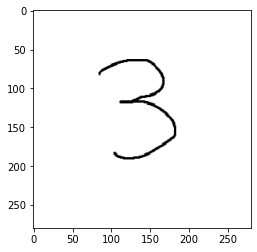

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [58]:
from PIL import Image

path = r'number3.png'

img = Image.open(path)

img.resize((28,28))

a = np.asarray(img)

plt.imshow(a)
plt.show()
a

In [56]:
model.predict_classes(a)

ValueError: in user code:

    C:\Users\Corey\anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\engine\training.py:1462 predict_function  *
        return step_function(self, iterator)
    C:\Users\Corey\anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\engine\training.py:1452 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\Corey\anaconda3\envs\tf\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\Corey\anaconda3\envs\tf\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\Corey\anaconda3\envs\tf\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\Corey\anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\engine\training.py:1445 run_step  **
        outputs = model.predict_step(data)
    C:\Users\Corey\anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\engine\training.py:1418 predict_step
        return self(x, training=False)
    C:\Users\Corey\anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    C:\Users\Corey\anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:191 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential is incompatible with the layer: : expected min_ndim=4, found ndim=3. Full shape received: [None, 280, 3]


## Notes from the Ott

In [ ]:
# gives you 0 and positive values 
# fast and simple weights/outputs 

# normalizes the coefficients so the weights 
# behaves more stably especially during fitting. 
model.add(BatchNormalization())

# drops out 50% of the batch nodes randomly 
# forces the model to be less perfect. Avoid overfitting 
model.add(Dropout(0.5))

# returns valid probabilities
# softmax good for categorical variables
# gives you valid probabilities 
model.add(Dense(10, activation='softmax'))